<a href="https://colab.research.google.com/github/vibhuti310/ML-Lab/blob/main/Programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
X = data.data
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = svm.SVC(kernel='linear', probability=True, verbose=True)

In [ ]:
clf.fit(X_train, y_train)

[LibSVM]

SVC(kernel='linear', probability=True, verbose=True)

In [ ]:
y_preds = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)
print("Predictions:", y_preds[:5])
print("Probabilities:", y_proba[:5])

Predictions: [1 0 0 1 1]
Probabilities: [[1.86645436e-01 8.13354564e-01]
 [9.99942793e-01 5.72066135e-05]
 [9.77039379e-01 2.29606212e-02]
 [3.42463584e-03 9.96575364e-01]
 [2.37509680e-06 9.99997625e-01]]


In [ ]:
# Reshape probabilities
y_proba = y_proba[:,1].reshape((y_proba.shape[0],))
print("2D to 1D reshaped Probability of benign. ", y_proba[:5])

2D to 1D reshaped Probability of benign.  [8.13354564e-01 5.72066135e-05 2.29606212e-02 9.96575364e-01
 9.99997625e-01]


In [ ]:
TN, FP, FN, TP = metrics.confusion_matrix(list(y_test), list(y_preds), labels=[0,1]).ravel()

print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

mat = metrics.confusion_matrix(y_test, y_preds, labels=[1,0])
print(mat)

TP: 106
TN: 59
FP: 4
FN: 2
[[106   2]
 [  4  59]]


In [ ]:
results={}

In [ ]:
# Accuracy
acc = (TP+TN)/(TP+TN+FP+FN)
results["ACC"] = acc
acc

0.9649122807017544

In [ ]:
# Precision
prec = TP/(TP+FP)
results["Prec"] = prec
prec 

0.9636363636363636

In [ ]:
# Recall
rec = TP/(TP+FN)
results["rec"] = rec
rec

0.9814814814814815

In [ ]:
# F1 score
fsc = (2 * prec * rec)/(prec + rec)
results["F1"] = fsc
fsc

0.9724770642201834

In [ ]:
# MCC
num = (TP * TN) - (FP * FN)
den = ((TP + FN)*(TN + FN)*(TN + FP)*(FP + TP))**0.5 
mcc = num/den
results["MCC"] = mcc
mcc

0.924397085079466

In [ ]:
# Specificity
spec = TN/(TN+FP)
results["spec"] = spec
spec

0.9365079365079365

In [ ]:
# NPV
npv = TN/(TN+FN)
results["npv"] = npv
npv

0.9672131147540983

In [ ]:
# Comparing calculated vs scikit
print("CALCULATED VALUES:")
print("Calucalted accuracy: ", results["ACC"])
print("Calucalted precision: ", results["Prec"])
print("Calucalted recall: ", results["rec"])
print("Calucalted F1 score: ", results["F1"])
print("Calucalted MCC: ", results["MCC"])
print("Calucalted specificity: ", results["spec"])
print("Calucalted npv: ", results["npv"])

CALCULATED VALUES:
Calucalted accuracy:  0.9649122807017544
Calucalted precision:  0.9636363636363636
Calucalted recall:  0.9814814814814815
Calucalted F1 score:  0.9724770642201834
Calucalted MCC:  0.924397085079466
Calucalted specificity:  0.9365079365079365
Calucalted npv:  0.9672131147540983


In [ ]:
# Scikit values
print("SCIKIT")
print("Accuracy:", metrics.accuracy_score(y_test, y_preds))
print("Precision:", metrics.precision_score(y_test, y_preds))
print("Recall:", metrics.recall_score(y_test, y_preds))
print("F1:", metrics.f1_score(y_test, y_preds))
print("MCC:", metrics.matthews_corrcoef(y_test, y_preds))

SCIKIT
Accuracy: 0.9649122807017544
Precision: 0.9636363636363636
Recall: 0.9814814814814815
F1: 0.9724770642201834
MCC: 0.924397085079466


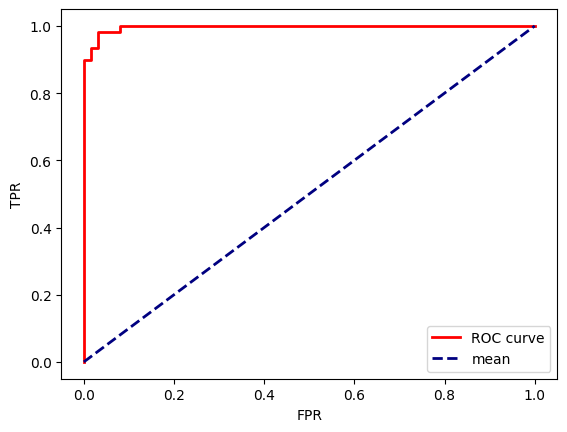

In [ ]:
# Plotting ROC and AUC
FPRs, TPRs, _ = metrics.roc_curve(y_test, y_proba)

# ROC
plt.plot(FPRs, TPRs, lw=2, color="red", label="ROC curve")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--", label="mean")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc = metrics.roc_auc_score(y_test, y_proba)
print(auc)

0.9964726631393298


# A2

In [ ]:
import numpy as np
class KNNClassifier:
  def __init__(self, n_neighbours=3):
    self.n_neighbours = n_neighbours

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X_test):
    predictions = []

    for x in X_test:
      distances = []

      for i, x_train in enumerate(self.X):
        distance = np.sqrt(np.sum((x-x_train)**2))
        distances.append((i, distance))

      distances.sort(key=lambda x: x[1])
      k_nearest = [self.y[i] for i, _ in distances[:self.n_neighbours]]
      prediction = max(k_nearest, key=k_nearest.count)
      predictions.append(prediction)

    return predictions

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
knn = KNNClassifier()
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
print(accuracy)
print(cm)

1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


<Axes: >

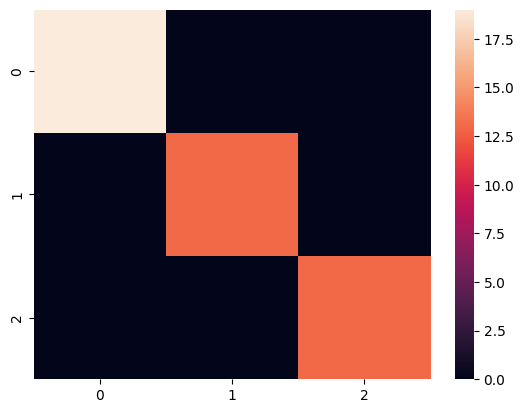

In [ ]:
import seaborn as sns
sns.heatmap(cm)

# B1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
data = load_iris()
data.DESCR[:500]

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n'

In [ ]:
X = data.data
y = data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=['species'])
                      
df = pd.concat([df, target], axis=1)
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
X = df.drop('species', axis=1)
y = df['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y_test.shape, y_preds.shape

((60,), (140,))

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_preds = lr.predict(X_test)
y_preds

array([ 1.24069097, -0.04537609,  2.24501083,  1.35143666,  1.29775083,
        0.01024241,  1.05031173,  1.82525399,  1.37084413,  1.06699186,
        1.70363485, -0.08712067, -0.165166  , -0.07724353, -0.03380619,
        1.40167699,  2.00651252,  1.04725931,  1.28368327,  1.97600474,
        0.01782354,  1.59952875,  0.079732  ,  1.92307532,  1.8621986 ,
        1.8790815 ,  1.80251247,  2.04196713,  0.01873817,  0.01291496,
       -0.15365607, -0.08046738,  1.18506728, -0.00461982, -0.02934265,
        1.68665136,  1.29088786, -0.07995434, -0.09076782, -0.16795331,
        1.75520461,  1.37514144,  1.3174234 , -0.07193336, -0.1131512 ])

In [ ]:
y_preds.shape

(140,)

In [ ]:
print("MAE:", metrics.mean_absolute_error(y_test, y_preds))
print("MSE:", metrics.mean_squared_error(y_test, y_preds))
print("MRSE:", np.sqrt(metrics.mean_squared_error(y_test, y_preds)))

MAE: 0.15332265627129657
MSE: 0.0386659123782579
MRSE: 0.19663649808277683


In [ ]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
print(len(X_test), len(y_test))

45 45


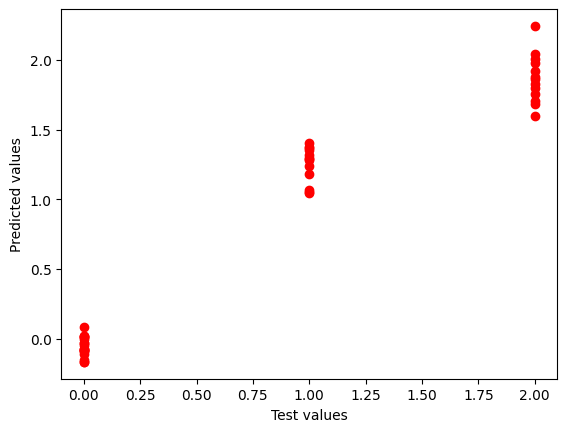

In [ ]:
#plt.scatter(X_test, y_test)
plt.scatter(y_test, y_preds,color='r')
plt.xlabel("Test values")
plt.ylabel("Predicted values")
plt.show()

# B2

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
X = df.drop('Sales', axis=1)
y = df['Sales']

In [ ]:
df.shape

(200, 4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_preds = lr.predict(X_test)

In [ ]:
X_train.shape, y_train.shape ,X_test.shape, y_test.shape

((140, 3), (140,), (60, 3), (60,))

In [ ]:
print("Slope:", lr.coef_)
print("Intercept:", lr.intercept_)

Slope: [0.05358869 0.10270677 0.00793167]
Intercept: 4.743766701589685


In [ ]:
print("MAE:", metrics.mean_absolute_error(y_test, y_preds))
print("MSE:", metrics.mean_squared_error(y_test, y_preds))
print("MRSE:", np.sqrt(metrics.mean_squared_error(y_test, y_preds)))

MAE: 1.1594875061090582
MSE: 2.541624036229147
MRSE: 1.5942471691143587


In [ ]:
import seaborn as sns

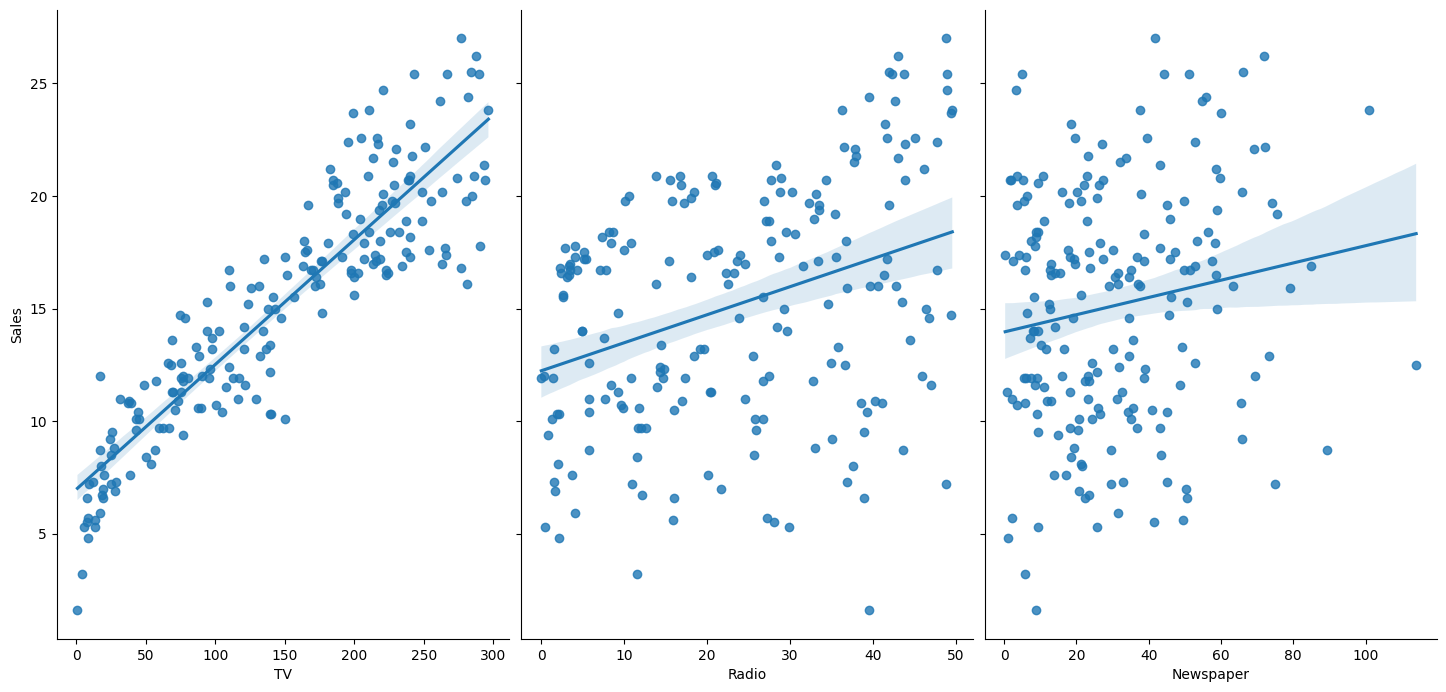

In [ ]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], height=7, aspect=0.7, kind='reg')

In [ ]:
lr.score(X, y)

0.9010094306195092

# B3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Name'] = encoder.fit_transform(df['Name'])

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_preds = clf.predict(X_test)

In [ ]:
y_preds[:5]

array([0, 0, 0, 1, 0])

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_preds))

Accuracy: 0.7565543071161048


In [ ]:
print("Confusion matrix:", metrics.confusion_matrix(y_test, y_preds))

Confusion matrix: [[139  27]
 [ 38  63]]


<Axes: >

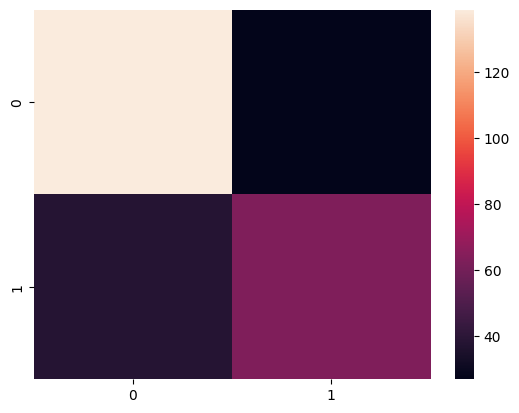

In [ ]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y_test, y_preds))

# B6

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('play_tennis.csv')
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [ ]:
encoder = LabelEncoder()
df = df.apply(encoder.fit_transform)

In [ ]:
model_cart = DecisionTreeClassifier(criterion='gini', max_depth=100)
model_id3 = DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [ ]:
X = df.drop('play', axis=1)
y = df['play']

In [ ]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model_cart.fit(X, y)
model_id3.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [ ]:
pred_cart = model_cart.predict(X_test)
pred_id3 = model_id3.predict(X_test)

In [ ]:
print("Accuracies")
metrics.accuracy_score(y_test, pred_cart), metrics.accuracy_score(y_test, pred_id3)

Accuracies


(1.0, 1.0)

In [ ]:
print("CM")
metrics.confusion_matrix(y_test, pred_cart), metrics.confusion_matrix(y_test, pred_id3)

CM


(array([[2, 0],
        [0, 3]]),
 array([[2, 0],
        [0, 3]]))

In [ ]:
from sklearn import tree


[Text(0.4, 0.9, 'x[1] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3, 0.5, 'x[1] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2, 0.3, 'x[0] <= 6.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.5, 'x[0] <= 9.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.3, 'x[1] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

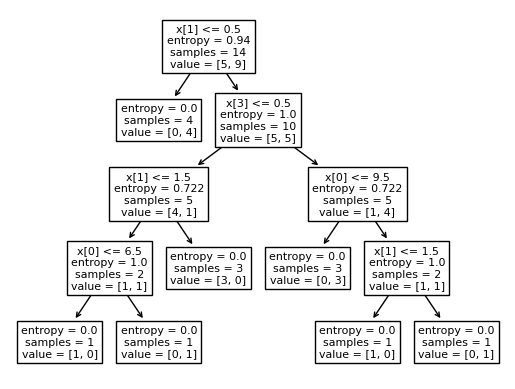

In [ ]:
tree.plot_tree(model_id3)

[Text(0.4444444444444444, 0.9, 'x[1] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5555555555555556, 0.7, 'x[3] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3333333333333333, 0.5, 'x[1] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'x[4] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'x[4] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.3, 'x[2] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.88888888

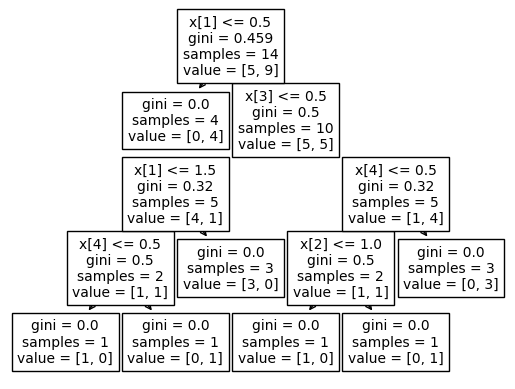

In [ ]:
tree.plot_tree(model_cart)